In [66]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import shap
import random

In [67]:
# load pre-trained model and data
model = VGG16(weights='imagenet', include_top=True)
X, y = shap.datasets.imagenet50()

In [68]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

In [ ]:
random_index = random.randint(0,48)

# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(X[random_index:(random_index+2)], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

  0%|          | 0/2498 [00:00<?, ?it/s]

In [ ]:
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

In [ ]:
# plot the explanations
shap.image_plot(shap_values=shap_values, pixel_values=to_explain, labels=index_names)

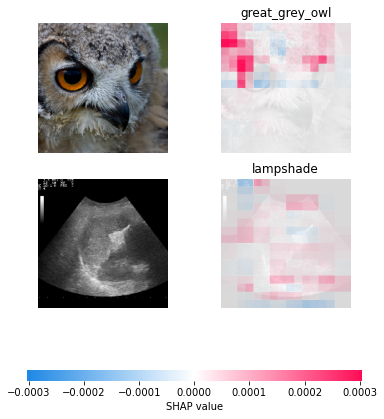

In [64]:
# output with shap values
shap.image_plot(shap_values_fine)